# 📘 Análise Descritiva e Preditiva de Cancelamento de Clientes (Churn)

## Objetivo: Analisar dados fictícios de clientes de um aplicativo e prever a chance de cancelamento.


# ---

## Etapa 1: Importar bibliotecas necessárias

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# ---

# Etapa 2: Carregando e visualizando os dados

In [64]:
df = pd.read_csv(r'C:\Users\alyson brenner\Documents\PROJETOS DATA ENGINER\churn-predictor-engdados\data\processed\churn_dataset.csv')

In [65]:
df.head()

,Unnamed: 0,id_cliente,data_cadastro,tempo_uso,qtde_pedidos,valor_medio,uso_cupom,usou_app_ultimo_mes,cancelou,categoria_tempo_uso
0,0,1,2024-10-25,235,5,127.38,0,usou,0,antigo
1,1,2,2023-09-11,645,3,103.02,0,usou,0,antigo
2,2,3,2023-07-06,712,4,61.12,0,usou,0,antigo
3,3,4,2025-01-12,156,3,97.93,1,usou,0,intermediário
4,4,5,2024-01-16,518,3,63.99,1,não usou,0,antigo


In [66]:
print("Informações gerais da base de dados:\n")
df.info()

Informações gerais da base de dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   id_cliente           1000 non-null   int64  
 2   data_cadastro        1000 non-null   object 
 3   tempo_uso            1000 non-null   int64  
 4   qtde_pedidos         1000 non-null   int64  
 5   valor_medio          1000 non-null   float64
 6   uso_cupom            1000 non-null   int64  
 7   usou_app_ultimo_mes  1000 non-null   object 
 8   cancelou             1000 non-null   int64  
 9   categoria_tempo_uso  1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [67]:
# transformando a coluna data_cadastro para o formato datetime
df['data_cadastro'] = pd.to_datetime(df['data_cadastro'])


# ---

## Etapa 4: Análise descritiva e exploração dos dados

### distribuição do tempo de uso:

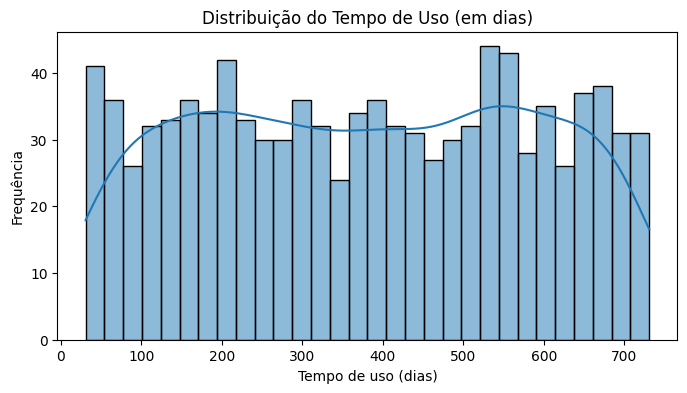

In [68]:
plt.figure(figsize=(8, 4))
sns.histplot(df['tempo_uso'], bins=30, kde=True)
plt.title('Distribuição do Tempo de Uso (em dias)')
plt.xlabel('Tempo de uso (dias)')
plt.ylabel('Frequência')
plt.show()

### relação entre uso do app no último mês e cancelamento:

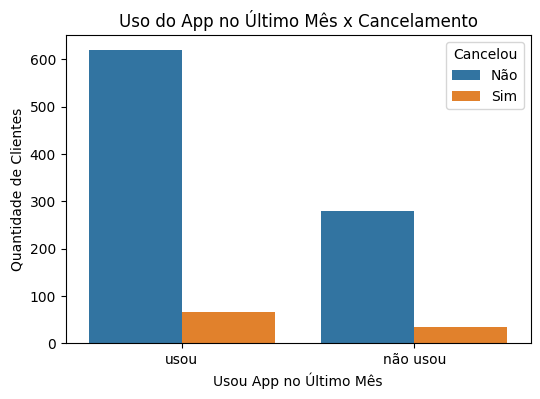

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x='usou_app_ultimo_mes', hue='cancelou', data=df)
plt.title('Uso do App no Último Mês x Cancelamento')
plt.xlabel('Usou App no Último Mês')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.show()

### Boxplot do valor médio comparado ao cancelamento:

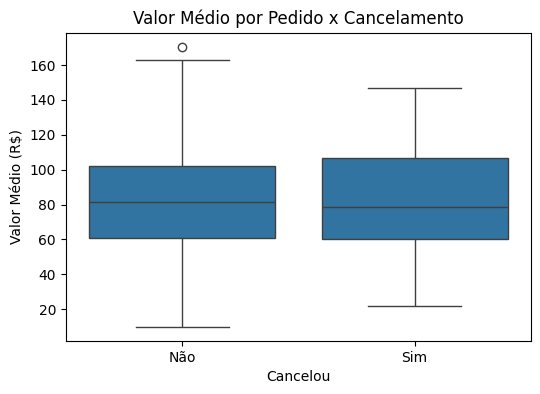

In [70]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='cancelou', y='valor_medio', data=df)
plt.title('Valor Médio por Pedido x Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Valor Médio (R$)')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

# ---

### Visualizar distribuição das categorias:

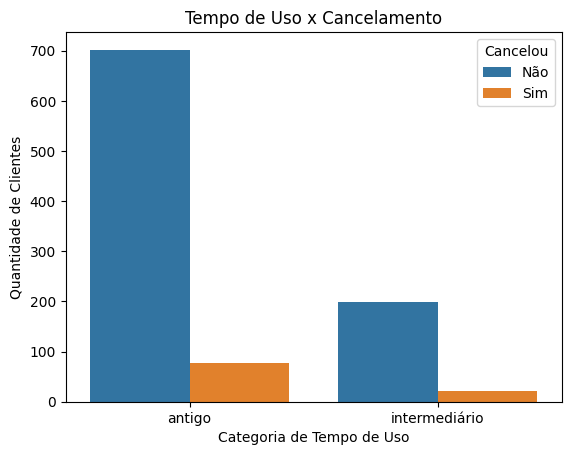

In [71]:
sns.countplot(x='categoria_tempo_uso', hue='cancelou', data=df)
plt.title('Tempo de Uso x Cancelamento')
plt.xlabel('Categoria de Tempo de Uso')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.show()


# ---

## Etapa 5: Preparar os dados para o modelo preditivo

### Codificar variáveis categóricas:

In [72]:

df_model = pd.get_dummies(df, columns=['categoria_tempo_uso', 'usou_app_ultimo_mes'], drop_first=True)


In [73]:
# Remover colunas que não serão usadas

df_model = df_model.drop(['id_cliente', 'data_cadastro'], axis=1)

In [74]:
# Separar variáveis independentes (X) e alvo (y)
X = df_model.drop('cancelou', axis=1)
y = df_model['cancelou']

In [75]:
# Dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---

# Etapa 6: Criar e treinar modelo preditivo

In [76]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Fazer previsões:

In [77]:
y_pred = modelo.predict(X_test)

### Avaliar desempenho do modelo:

In [78]:
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       179
           1       0.00      0.00      0.00        21

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200



c:\Users\alyson brenner\Documents\PROJETOS DATA ENGINER\churn-predictor-engdados\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alyson brenner\Documents\PROJETOS DATA ENGINER\churn-predictor-engdados\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alyson brenner\Documents\PROJETOS DATA ENGINER\churn-predictor-engdados\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

### Matriz de confusão:

In [79]:

print("\nMatriz de Confusão:\n")
print(confusion_matrix(y_test, y_pred))


Matriz de Confusão:

[[179   0]
 [ 21   0]]


# ---

# Etapa 7: Importância das variáveis

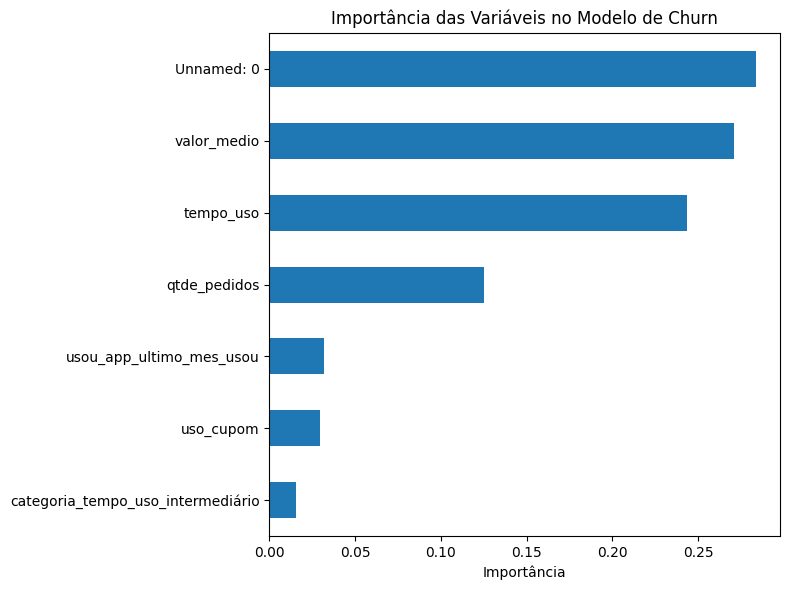

In [80]:
importancias = modelo.feature_importances_
features = pd.Series(importancias, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
features.plot(kind='barh')
plt.title('Importância das Variáveis no Modelo de Churn')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()